# Andrew Ingrassia |  *Data Analysis Career Exploration*

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

bls = pd.read_csv("bls_projections.csv")

***

**DATA OVERVIEW**: *Bureau of Labor Statistics - Occupational Projections Data*


*Dataset Link*: https://data.bls.gov/projections/occupationProj | *Full Dataset Explanation*: https://www.bls.gov/emp/documentation/nem-definitions.htm


This dataset comes from the US Bureau of Labor Statistics and presents occupational data related to:

- *Historical and projected employment by occupation (2019 - 2029)*


- *Projections of separations from occupations that will result in openings for new workers (2019 - 2029)*


- *Typical education, experience, and training requirements for each occupation*


- *Average annual occupational openings (2019 - 2029)*


- *Median annual wages (as of 2020)*

***

**CLEANING THE DATA**: 

In [8]:
# Creates a new, modified version of the "bls" dataframe
bls_growth = bls[["Occupation Title", 
                  "Employment 2019", 
                  "Employment 2029", 
                  "Employment Percent Change, 2019-2029",
                  "Occupational Openings, 2019-2029 Annual Average",
                  "Median Annual Wage 2020"]]

# Sorts the new dataframe according to projected % employment growth from 2019 - 2029 (top 20 only)
bls_growth = bls_growth.sort_values("Employment Percent Change, 2019-2029", ascending = False).head(20)

# Renames the new df columns for clarity
bls_growth = bls_growth.rename(columns = {"Occupation Title": "Occupation", 
                                          "Employment 2019": "2019", 
                                          "Employment 2029": "2029", 
                                          "Employment Percent Change, 2019-2029": "Growth",
                                          "Occupational Openings, 2019-2029 Annual Average": "Openings",
                                          "Median Annual Wage 2020": "Wage"})

# Assigns new index values representing each associated occupation's rank (according to projected employment growth)
rank = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
bls_growth["Rank"] = rank
bls_growth.set_index("Rank", inplace = True)


# Adds a "Code" column containing letters that each represent the associated occupation (wind turbine service tech = "A", etc.)
occupation_codes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"]
bls_growth["Code"] = occupation_codes

bls_growth.to_csv("bls_growth.csv")

***

**VIEWING THE MODIFIED DATAFRAME**

In [4]:
bls_growth   # modified version of the original "bls" dataframe

,Occupation,2019,2029,Growth,Openings,Wage,Code
Rank,,,,,,,
1,Wind turbine service technicians * Wind Ene...,7.0,11.3,60.7,1.3,"56,230",A
2,Nurse practitioners * Acute Care Nurse Prac...,211.3,322.0,52.4,24.2,"111,680",B
3,Solar photovoltaic installers * PV Installe...,12.0,18.1,50.5,2.3,"46,470",C
4,Statisticians * Analytical Statistician* Ap...,42.7,57.5,34.6,4.9,"92,270",D
5,Occupational therapy assistants * COTA* Cer...,47.1,63.5,34.6,6.9,"62,940",E
6,Home health and personal care aides,"3,439.7","4,599.2",33.7,568.8,"27,080",F
7,Physical therapist assistants * LPTA* Licen...,98.7,130.9,32.6,15.1,"59,770",G
8,Medical and health services managers * Clin...,422.3,555.5,31.5,47.0,"104,280",H
9,Physician assistants * Anesthesiologist Ass...,125.5,164.8,31.3,11.4,"115,390",I


***

**COLUMN EXPLANATIONS**

- **Rank** - each occupation's rank according to the associated value within the the "Growth" column


- **Occupation** - occupation titles


- **2019** - employment (in thousands) within the associated occupation in 2019


- **2029** - projected employment (in thousands) within the associated occupation by 2029


- **Growth** - projected percent increase in employment within the associated occupation by 2029


- **Openings** - projected annual average number (in thousands) of openings/positions for workers entering the associated occupation between 2019 and 2029


- **Wage** - median annual wage for the associated occupation in 2020 ($86,200 for data analysts)


- **Code** - each occupation title is assigned a letter that will represent that occupation within my visualization

***

**VISUALIZING THE DATA**: *Percent Projected Employment Growth 2019 - 2029*

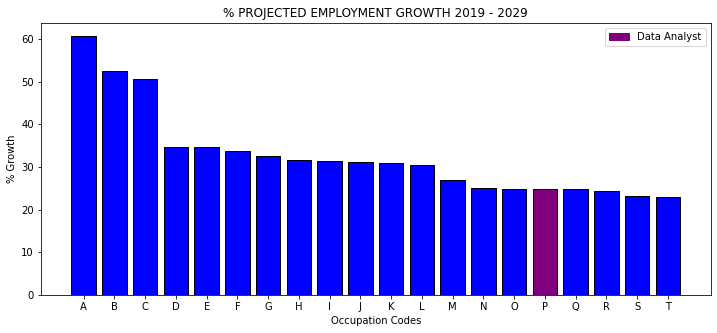

In [7]:
# Creates the plot, sets the x and y axes, and determines the aesthetic characteristics of the bars
plt.bar(bls_growth["Code"], 
        bls_growth["Growth"], 
        color = ["b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "purple", "b", "b", "b", "b"], 
        edgecolor = "black")

# Adds a label to the x axis
plt.xlabel("Occupation Codes")

# Adds a label to the y axis
plt.ylabel("% Growth")

# Adds a title to the plot
plt.title("% PROJECTED EMPLOYMENT GROWTH 2019 - 2029")

# Customizes the plot dimensions
plt.rcParams["figure.figsize"] = [12, 5]

# Adds a custom legend to the plot
data_analysis = mpatches.Patch(color = "purple", label = "Data Analyst")
plt.legend(handles = [data_analysis])

***

**VISUALIZING THE DATA**: *Average Occupational Openings 2019 - 2029*

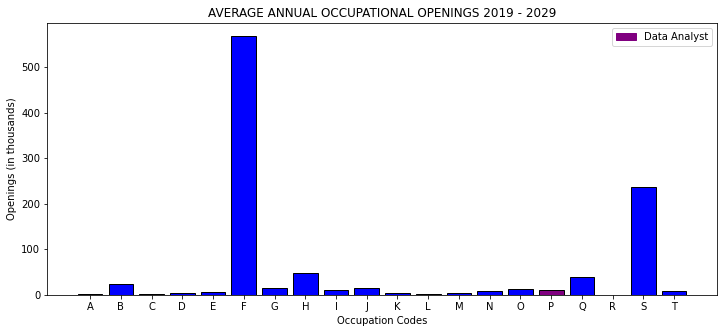

In [6]:
# Creates the plot, sets the x and y axes, and determines the aesthetic characteristics of the bars
plt.bar(bls_growth["Code"], 
        bls_growth["Openings"], 
        color = ["b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "purple", "b", "b", "b", "b"], 
        edgecolor = "black")

# Adds a label to the x axis
plt.xlabel("Occupation Codes")

# Adds a label to the y axis
plt.ylabel("Openings (in thousands)")

# Adds a title to the plot
plt.title("AVERAGE ANNUAL OCCUPATIONAL OPENINGS 2019 - 2029")

# Customizes the plot dimensions
plt.rcParams["figure.figsize"] = [12, 5]

# Adds a custom legend to the plot
data_analysis = mpatches.Patch(color = "purple", label = "Data Analyst")
plt.legend(handles = [data_analysis])